In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


In [39]:
df = pd.read_pickle(r'E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/.cleaned_data/pneumatic_screwdriver_dataset_final.pkl')
# df = pd.read_pickle(r'E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/.cleaned_data/electric_screwdriver_dataset_final.pkl')
# df = pd.read_pickle(r'E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/.cleaned_data/pneumatic_rivet_gun_dataset_final.pkl')

In [40]:
X_acc = torch.tensor(np.array(df['X_acc'].tolist()), dtype=torch.float32)
X_gyr = torch.tensor(np.array(df['X_gyr'].tolist()), dtype=torch.float32)
X_mag = torch.tensor(np.array(df['X_mag'].tolist()), dtype=torch.float32)
X_mic = torch.tensor(np.array(df['X_mic'].tolist()), dtype=torch.float32)

In [41]:
df

,X_acc,X_gyr,X_mag,X_mic,y
0,"[[-8.181386999999999, -1.326841, 5.369634], [-...","[[0.03834952, 0.0479369, -0.0330231999999999],...","[[3.033314e-05, 3.571011e-05, -7.440094e-05], ...","[[-9.0], [-10.0], [-8.0], [-11.0], [-9.0], [-9...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
1,"[[-1.8099134160081944, 0.1087799255877475, 11....","[[-0.4584987237659741, -0.5866513944834649, -0...","[[9.945270436436576e-06, 4.2846186000138336e-0...","[[9.0], [4.0], [5.0], [10.0], [8.0], [9.0], [1...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
2,"[[-7.956255, -1.365161, 5.476361420195211], [-...","[[-0.0437756567125436, -0.0069741248094234, -0...","[[2.45425676708681e-05, 3.3017137926504533e-05...","[[-17.0], [-13.0], [-15.0], [-15.0], [-16.0], ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
3,"[[0.2421651884762856, -2.6690406529175283, 9.0...","[[-1.0099059510143378, -0.8729832721608999, -0...","[[1.42689211604701e-05, 3.281328465222855e-05,...","[[-62.0], [-50.0], [-46.0], [-53.0], [-48.0], ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,"[[-9.116696412545116, -1.8706803799629304, 6.5...","[[-0.0638014508145546, -0.1894515914057164, -0...","[[2.534905968201015e-05, 3.244690219079391e-05...","[[5.0], [6.0], [5.0], [-3.0], [-2.0], [-21.0],...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...
6132,"[[-1.531282396092969, 0.9469639934712094, 9.28...","[[-0.0183166349128112, 0.0932698076199302, -0....","[[6.4938691093020615e-06, 5.097516236479563e-0...","[[28.0], [30.0], [30.0], [29.0], [27.0], [26.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
6133,"[[-1.992877026949248, 2.1408488713752654, 9.04...","[[0.0958303611735726, 0.4559194824476258, 0.64...","[[5.3086179071405e-06, 5.0244196371438e-05, -6...","[[-6.0], [-12.0], [-16.0], [-12.0], [-8.0], [4...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
6134,"[[-2.2227469364514127, 2.4649965585297067, 8.6...","[[0.8298850800678744, -0.0336054525345346, 0.9...","[[5.239810175283827e-06, 5.259276775916619e-05...","[[-7.0], [-7.0], [-7.0], [-5.0], [-3.0], [-4.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
6135,"[[-1.4671363246347828, 1.7551011686705849, 8.7...","[[-0.2811376004633807, 0.1964712629831963, -0....","[[9.61695587571588e-06, 5.191649309520268e-05,...","[[-2.0], [-5.0], [-5.0], [-4.0], [-4.0], [-5.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [42]:
# verify the output type and shape eg. torch.size([7187, 41, 3])
X_gyr.shape, X_acc.shape, X_mag.shape, X_mic.shape

(torch.Size([6137, 41, 3]),
 torch.Size([6137, 41, 3]),
 torch.Size([6137, 62, 3]),
 torch.Size([6137, 3200, 1]))

## Model Architecture

In [43]:

# Attention Module
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size, 1)

    def forward(self, x):
        scores = self.attn(x).squeeze(-1)              # [batch, time]
        weights = F.softmax(scores, dim=1).unsqueeze(-1)  # [batch, time, 1]
        weighted = x * weights
        context = weighted.sum(dim=1)                  # [batch, hidden]
        return context, weights

# Per-sensor LSTM + attention branch
class SensorBranch(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SensorBranch, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attn = Attention(hidden_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        context, att_weights = self.attn(lstm_out)
        return context, att_weights  # return attention for XAI

# Full joint model
class JointATLSTM(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.acc = SensorBranch(3, 64)
        self.gyr = SensorBranch(3, 64)
        self.mag = SensorBranch(3, 64)
        self.mic = SensorBranch(1, 64)

        self.fc = nn.Sequential(
            nn.Linear(64 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x_acc, x_gyr, x_mag, x_mic):
        acc_feat, acc_att = self.acc(x_acc)
        gyr_feat, gyr_att = self.gyr(x_gyr)
        mag_feat, mag_att = self.mag(x_mag)
        mic_feat, mic_att = self.mic(x_mic)

        combined = torch.cat([acc_feat, gyr_feat, mag_feat, mic_feat], dim=1)
        output = self.fc(combined)

        attention_maps = {
            "acc": acc_att.squeeze(-1),  # [batch, time]
            "gyr": gyr_att.squeeze(-1),
            "mag": mag_att.squeeze(-1),
            "mic": mic_att.squeeze(-1)
        }

        return output, attention_maps

# Focal Loss for imbalanced data
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha  # tensor of shape [num_classes]
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        probs = torch.sigmoid(inputs)
        pt = torch.where(targets == 1, probs, 1 - probs)
        focal_term = (1 - pt) ** self.gamma

        if self.alpha is not None:
            alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
            focal_term = alpha_t * focal_term

        loss = focal_term * BCE_loss
        return loss.mean() if self.reduction == 'mean' else loss

## Cross-Attention -- Not using this Skip it

In [7]:
# Same Attention module
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attn = nn.Linear(hidden_size, 1)

    def forward(self, x):
        scores = self.attn(x).squeeze(-1)              # [B, T]
        weights = F.softmax(scores, dim=1).unsqueeze(-1)  # [B, T, 1]
        context = (x * weights).sum(dim=1)             # [B, H]
        return context, weights

# Per-sensor LSTM encoder
class SensorBranch(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

    def forward(self, x):
        out, _ = self.lstm(x)  # [B, T, H]
        return out

# Cross-modal attention block (added)
class CrossModalAttentionBlock(nn.Module):
    def __init__(self, dim, nhead=4, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim=dim, num_heads=nhead, dropout=dropout, batch_first=True)
        self.norm = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key_value):
        attn_out, _ = self.attn(query, key_value, key_value)
        return self.norm(query + self.dropout(attn_out))

# Final Joint Cross-Attention LSTM model
class JointCrossAttentionLSTM(nn.Module):
    def __init__(self, num_classes=8, hidden_dim=64):
        super().__init__()
        # Sensor branches (LSTM only)
        self.acc = SensorBranch(3, hidden_dim)
        self.gyr = SensorBranch(3, hidden_dim)
        self.mag = SensorBranch(3, hidden_dim)
        self.mic = SensorBranch(1, hidden_dim)

        # Cross-modal attention
        self.cross_att = nn.ModuleDict({
            'acc': CrossModalAttentionBlock(hidden_dim),
            'gyr': CrossModalAttentionBlock(hidden_dim),
            'mag': CrossModalAttentionBlock(hidden_dim),
            'mic': CrossModalAttentionBlock(hidden_dim)
        })

        # Intra-sensor attention
        self.attn = nn.ModuleDict({
            'acc': Attention(hidden_dim),
            'gyr': Attention(hidden_dim),
            'mag': Attention(hidden_dim),
            'mic': Attention(hidden_dim)
        })

        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 4, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x_acc, x_gyr, x_mag, x_mic):
        # Step 1: Encode each sensor sequence with LSTM
        acc_seq = self.acc(x_acc)  # [B, T, H]
        gyr_seq = self.gyr(x_gyr)
        mag_seq = self.mag(x_mag)
        mic_seq = self.mic(x_mic)

        # Step 2: Cross-attend each sensor with one other (you can generalize)
        acc_seq = self.cross_att['acc'](acc_seq, mic_seq)
        gyr_seq = self.cross_att['gyr'](gyr_seq, acc_seq)
        mag_seq = self.cross_att['mag'](mag_seq, gyr_seq)
        mic_seq = self.cross_att['mic'](mic_seq, mag_seq)

        # Step 3: Apply intra-sensor attention (temporal pooling)
        acc_feat, acc_att = self.attn['acc'](acc_seq)
        gyr_feat, gyr_att = self.attn['gyr'](gyr_seq)
        mag_feat, mag_att = self.attn['mag'](mag_seq)
        mic_feat, mic_att = self.attn['mic'](mic_seq)

        # Step 4: Feature fusion and classification
        combined = torch.cat([acc_feat, gyr_feat, mag_feat, mic_feat], dim=1)
        output = self.fc(combined)

        attention_maps = {
            "acc": acc_att.squeeze(-1),
            "gyr": gyr_att.squeeze(-1),
            "mag": mag_att.squeeze(-1),
            "mic": mic_att.squeeze(-1)
        }

        return output, attention_maps

## Parameters Configurations

In [44]:
# --- Parameters ---
os.chdir(r"E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/models")
num_epochs = 100
batch_size = 32
patience = 10  # for early stopping
validation_split = 0.2

# --- Dataset ---
y_one_hot = torch.tensor(df["y"].tolist(), dtype=torch.float32)
dataset = TensorDataset(X_acc, X_gyr, X_mag, X_mic, y_one_hot)
# dataset = TensorDataset(X_acc, X_gyr, X_mag, y_one_hot) #Without mic data
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)

In [45]:
y_labels = torch.argmax(y_one_hot, dim=1)  # shape: [N]
unique_labels, counts = torch.unique(y_labels, return_counts=True)

# Convert to dict for easy viewing
label_counts = dict(zip(unique_labels.tolist(), counts.tolist()))
print(label_counts)


{0: 314, 1: 310, 2: 67, 3: 48, 4: 99, 5: 5198, 6: 64, 7: 37}


## Training Process

In [ ]:

# Calculate class weights for BCEWithLogitsLoss
# class_counts = torch.tensor([834, 348, 303, 135, 74, 88, 5393, 12], dtype=torch.float32)
# total_samples = class_counts.sum()
# neg_counts = total_samples - class_counts
# pos_weight = neg_counts / class_counts
# pos_weight = pos_weight / pos_weight.mean()
# print("pos_weight:", pos_weight)
# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(device))  # Use pos_weight for class imbalance
'''{14: 'tightening_double',
 7: 'shaking',
 8: 'undefined',
 2: 'tightening',
 5: 'motor_activity_ccw',
 4: 'motor_activity_cw',
 3: 'untightening',
 6: 'manual_motor_rotation'}

  {np.int64(2): 0,
 np.int64(3): 1,
 np.int64(4): 2,
 np.int64(5): 3,
 np.int64(6): 4,
 np.int64(7): 5,
 np.int64(8): 6,
 np.int64(14): 7}

  "pneumatic_screwdriver"

{7: 'shaking',
 5: 'motor_activity_ccw',
 3: 'untightening',
 38: 'impact',
 8: 'undefined',
 2: 'tightening',
 4: 'motor_activity_cw',
 14: 'tightening_double'}
 
  {np.int64(2): 0,
 np.int64(3): 1,
 np.int64(4): 2,
 np.int64(5): 3,
 np.int64(7): 4,
 np.int64(8): 5,
 np.int64(14): 6,
 np.int64(38): 7}

# "pneumatic_rivet_gun"

{38: 'impact',
 30: 'pull_trigger_air_with_rivet',
 28: 'pull_trigger_not_removed',
 8: 'undefined',
 25: 'pull_trigger',
 29: 'pull_trigger_air',
 7: 'shaking'}

'''


# Class mapping for pneumatic screwdriver dataset
# (array([ 2,  3,  4,  5,  7,  8, 14, 38]),
#   array([ 314,  310,   67,   48,   99, 5198,   64,   37])))

# Class mapping for pneumatic rivet gun dataset
# (array([ 7,  8, 25, 38]), array([ 110, 9273,    5,   40]))
# --- Model, loss, optimizer ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = JointATLSTM(num_classes=8).to(device)
# model = JointATLSTM(num_classes=4).to(device) # for pneumatic rivet gun dataset

# model = JointCrossAttentionLSTM(num_classes=8).to(device)  # Use the final model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# Focal Loss with alpha (inverse frequency normalization)
# Compute alpha (inverse frequency normalized)
#=>>>>>>>>>>>>>>>>>>>>>>>>> for electric screwdriver dataset
class_counts = torch.tensor([834, 348, 303, 135, 74, 88, 5393, 12], dtype=torch.float32)

# ->>>>>>>>>>>>>>>>>>>>>>>>> for pneumatic screwdriver dataset
# class_counts = torch.tensor([ 314,  310,   67,   48,   99, 5198,   64,   37], dtype=torch.float32)

# ->>>>>>>>>>>>>>>>>>>>>>>>> for pneumatic rivet gun dataset
# class_counts = torch.tensor([ 110, 9273,    5,   40], dtype=torch.float32)

alpha = (1.0 / class_counts)
alpha = alpha / alpha.sum()  # normalize to sum to 1
alpha = alpha.to(device)

# Instantiate Focal Loss
criterion = FocalLoss(gamma=2.0, alpha=alpha)


# --- Accuracy Function ---
def compute_accuracy(outputs, labels, threshold=0.5):
    preds = (torch.sigmoid(outputs) >= threshold).float()
    correct = (preds == labels).float().sum()
    total = torch.numel(preds)
    return correct / total

# --- Early Stopping ---
best_val_loss = float('inf')
wait = 0
best_model_path = "best_model_checkpoint_with_class_wt_focal_loss_cross_att_rivet_gun.pth" # change the name as per dataset->>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<

print(f"Training on {device}...\n")

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0

    for batch in train_loader:
        x_acc, x_gyr, x_mag, x_mic, labels = [b.to(device) for b in batch]
        # x_acc, x_gyr, x_mag, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs, _ = model(x_acc, x_gyr, x_mag, x_mic)
        # outputs, _ = model(x_acc, x_gyr, x_mag)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x_acc.size(0)
        train_correct += compute_accuracy(outputs, labels).item() * labels.numel()
        train_total += labels.numel()

    train_loss /= len(train_loader.dataset)
    train_acc = train_correct / train_total

    # --- Validation ---
    model.eval()
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    with torch.no_grad():
        for batch in val_loader:
            x_acc, x_gyr, x_mag, x_mic, labels = [b.to(device) for b in batch]
            outputs, _ = model(x_acc, x_gyr, x_mag, x_mic)
            # x_acc, x_gyr, x_mag, labels = [b.to(device) for b in batch]
            # outputs, _ = model(x_acc, x_gyr, x_mag)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * x_acc.size(0)
            val_correct += compute_accuracy(outputs, labels).item() * labels.numel()
            val_total += labels.numel()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total

    elapsed = time.time() - start_time
    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - "
          f"Train Acc: {train_acc:.4f} - Val Acc: {val_acc:.4f} - Time: {elapsed:.2f}s")

    # --- Checkpoint ---
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        torch.save({
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "epoch": epoch + 1,
            "loss": val_loss
        }, best_model_path)
        print("✔️  Saved new best model.")
    else:
        wait += 1
        if wait >= patience:
            print("⏹️  Early stopping triggered.")
            break

print("\n Training complete.")


Training on cuda...

Epoch 1/100 - Train Loss: 0.0260 - Val Loss: 0.0009 - Train Acc: 0.7330 - Val Acc: 0.7500 - Time: 7.47s
✔️  Saved new best model.
Epoch 2/100 - Train Loss: 0.0010 - Val Loss: 0.0009 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 3.59s
✔️  Saved new best model.
Epoch 3/100 - Train Loss: 0.0010 - Val Loss: 0.0009 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 2.90s
✔️  Saved new best model.
Epoch 4/100 - Train Loss: 0.0010 - Val Loss: 0.0009 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 2.98s
✔️  Saved new best model.
Epoch 5/100 - Train Loss: 0.0009 - Val Loss: 0.0008 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 3.08s
✔️  Saved new best model.
Epoch 6/100 - Train Loss: 0.0009 - Val Loss: 0.0007 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 2.99s
✔️  Saved new best model.
Epoch 7/100 - Train Loss: 0.0008 - Val Loss: 0.0007 - Train Acc: 0.7500 - Val Acc: 0.7500 - Time: 3.03s
✔️  Saved new best model.
Epoch 8/100 - Train Loss: 0.0008 - Val Loss: 0.0007 - Train Acc: 0.75

## Performance evaluation using Cross-Validation


 Fold 1/5
Fold 1 Accuracy: 0.968, Macro F1: 0.862

 Fold 2/5
Fold 2 Accuracy: 0.980, Macro F1: 0.911

 Fold 3/5
Fold 3 Accuracy: 0.976, Macro F1: 0.877

 Fold 4/5
Fold 4 Accuracy: 0.971, Macro F1: 0.893

 Fold 5/5
Fold 5 Accuracy: 0.964, Macro F1: 0.849


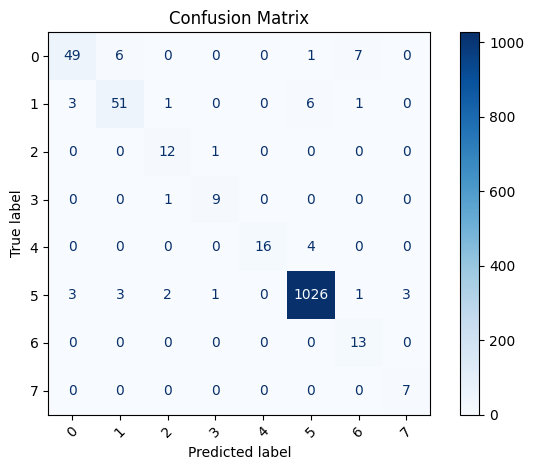

              precision    recall  f1-score   support

           0      0.891     0.778     0.831        63
           1      0.850     0.823     0.836        62
           2      0.750     0.923     0.828        13
           3      0.818     0.900     0.857        10
           4      1.000     0.800     0.889        20
           5      0.989     0.987     0.988      1039
           6      0.591     1.000     0.743        13
           7      0.700     1.000     0.824         7

    accuracy                          0.964      1227
   macro avg      0.824     0.901     0.849      1227
weighted avg      0.968     0.964     0.965      1227


 Cross-Validation Results Summary (Averaged across folds):
Accuracy       : 0.972
Macro Precision: 0.851
Macro Recall   : 0.931
Macro F1-score : 0.878


In [46]:
# --- Constants ---
k_folds = 5
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Convert one-hot to class indices ---
y_indices = torch.argmax(y_one_hot, dim=1).numpy()

# --- Prepare Stratified K-Fold ---
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_reports = []

# --- Load Trained Model Once ---
model = JointATLSTM(num_classes=8).to(device)
best_model_path = r"E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/models/best_model_checkpoint_with_class_wt_focal_loss_cross_att_pneumatic_screwd.pth"
# best_model_path = r"E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/models/best_model_checkpoint_with_class_wt_focal_loss.pth"
# best_model_path = r"E:/MS_AI/Sem-IV/Seminar-ADLTS/exAI-timeseries-tool-tracking-data/models/best_model_checkpoint_with_class_wt_focal_loss_cross_att_rivet_gun.pth"

checkpoint = torch.load(best_model_path, map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

# --- Store reports ---
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(y_indices)), y_indices)):
    print(f"\n Fold {fold + 1}/{k_folds}")

    val_dataset = TensorDataset(
        X_acc[val_idx], X_gyr[val_idx], X_mag[val_idx], X_mic[val_idx], y_one_hot[val_idx]
    )
    
    # val_dataset = TensorDataset(
    #     X_acc[val_idx], X_gyr[val_idx], X_mag[val_idx],  y_one_hot[val_idx]
    # )
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            x_acc, x_gyr, x_mag, x_mic, labels = [b.to(device) for b in batch]
            # x_acc, x_gyr, x_mag, labels = [b.to(device) for b in batch]
            # outputs, _ = model(x_acc, x_gyr, x_mag)
            outputs, _ = model(x_acc, x_gyr, x_mag, x_mic)
            all_preds.append(outputs.sigmoid().cpu())
            all_labels.append(labels.cpu())

    preds = torch.cat(all_preds).numpy()
    labels = torch.cat(all_labels).numpy()

    y_pred = np.argmax(preds, axis=1)
    y_true = np.argmax(labels, axis=1)

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(
        y_true, y_pred, digits=3, output_dict=True, zero_division=0
    )

    # Add accuracy manually
    report["accuracy"] = {"value": acc}

    
    print(f"Fold {fold + 1} Accuracy: {acc:.3f}, Macro F1: {report['macro avg']['f1-score']:.3f}")
    fold_metrics.append(report)

# --- Aggregate Metrics ---
def aggregate_metrics(metric_list, metric_name):
    return np.mean([m[metric_name]["precision"] for m in metric_list]), \
           np.mean([m[metric_name]["recall"] for m in metric_list]), \
           np.mean([m[metric_name]["f1-score"] for m in metric_list])

macro_prec, macro_rec, macro_f1 = aggregate_metrics(fold_metrics, "macro avg")
# weighted_prec, weighted_rec, weighted_f1 = aggregate_metrics(fold_metrics, "weighted avg")
avg_acc = np.mean([m["accuracy"]["value"] for m in fold_metrics])
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=3, zero_division=0))
# --- Final Summary ---
print("\n Cross-Validation Results Summary (Averaged across folds):")
print(f"Accuracy       : {avg_acc:.3f}")
print(f"Macro Precision: {macro_prec:.3f}")
print(f"Macro Recall   : {macro_rec:.3f}")
print(f"Macro F1-score : {macro_f1:.3f}")
# print(f"Weighted Precision: {weighted_prec:.3f}")
# print(f"Weighted Recall   : {weighted_rec:.3f}")
# print(f"Weighted F1-score : {weighted_f1:.3f}")

# Use macro metrics for fair, class-wise evaluation
# 🔹 Macro F1-score is the best metric for your use case.
# 🔹 It ensures small but important classes (like 3, 4, 5, 7) are not ignored.
# 🔹 Supplement with weighted metrics if needed, but don’t rely on accuracy alone.



In [47]:
model.eval()
with torch.no_grad():
    x_acc, x_gyr, x_mag, x_mic, labels = next(iter(val_loader))  # <- use val_loader
    x_acc, x_gyr, x_mag, x_mic = x_acc.to(device), x_gyr.to(device), x_mag.to(device), x_mic.to(device)

    outputs, att_weights = model(x_acc, x_gyr, x_mag, x_mic)
    predictions = torch.sigmoid(outputs)  # Optional: convert logits to probabilities 

    print("Predictions shape:", predictions.shape)
    print("Attention weights per modality:")
    for modality, weights in att_weights.items():
        print(f"{modality}: {weights.shape}")

Predictions shape: torch.Size([32, 8])
Attention weights per modality:
acc: torch.Size([32, 41])
gyr: torch.Size([32, 41])
mag: torch.Size([32, 62])
mic: torch.Size([32, 3200])


## Visualization of Attention Weights at Instance Level and Global Level

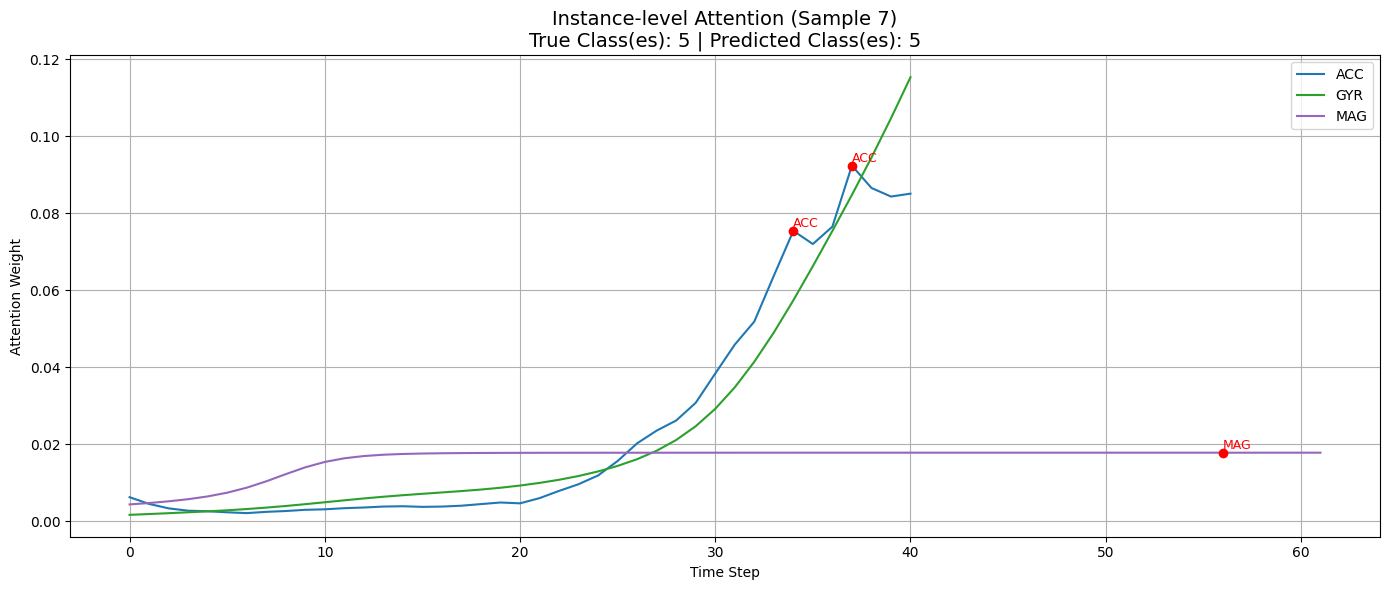

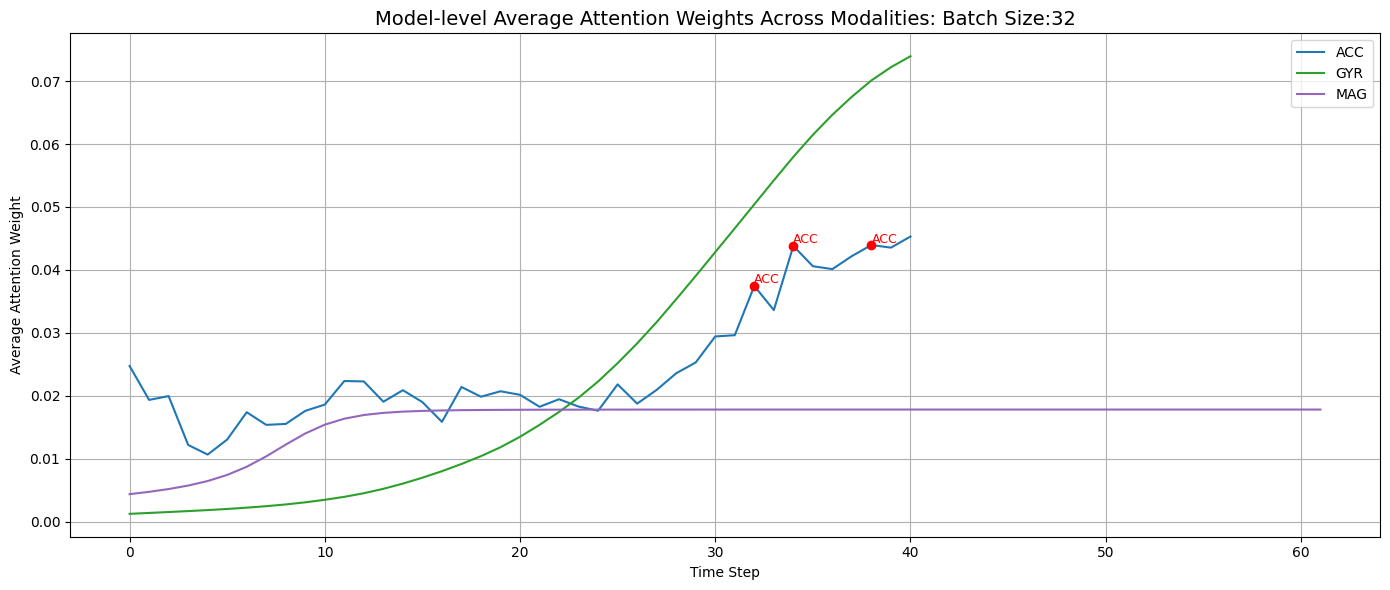

In [48]:
from scipy.signal import find_peaks


# Select one sample from the batch
sample_idx = 7
modalities = ['acc', 'gyr', 'mag']
colors = {
    'acc': 'tab:blue',
    'gyr': 'tab:green',
    'mag': 'tab:purple',
    'mic': 'tab:orange'
}

# Assuming you already have outputs (logits), att_weights, and labels for the batch
# outputs: tensor of shape [batch_size, num_classes]
# labels: tensor of shape [batch_size, num_classes] (one-hot or multi-label)
# att_weights: dict of tensors with shape [batch_size, time_steps]

# Convert logits to predicted classes (multi-label binary classification)
pred_probs = torch.sigmoid(outputs)  # probabilities [batch_size, num_classes]
pred_labels = (pred_probs >= 0.5).float()  # thresholding at 0.5

# Get true and predicted classes for selected sample
true_class_vec = labels[sample_idx].cpu().numpy()
pred_class_vec = pred_labels[sample_idx].cpu().numpy()

# If you want class indices instead of vectors (for multi-label, show all classes with 1)
true_classes = [str(i) for i, v in enumerate(true_class_vec) if v == 1]
pred_classes = [str(i) for i, v in enumerate(pred_class_vec) if v == 1]

true_class_str = ", ".join(true_classes) if true_classes else "None"
pred_class_str = ", ".join(pred_classes) if pred_classes else "None"


# --- Instance-level (single sample) ---
plt.figure(figsize=(14, 6))
plt.title(
    f'Instance-level Attention (Sample {sample_idx})\n'
    f'True Class(es): {true_class_str} | Predicted Class(es): {pred_class_str}',
    fontsize=14
)

peak_candidates = []

# Plot each curve and store peak info
for modality in modalities:
    att = att_weights[modality][sample_idx].cpu().numpy()
    plt.plot(att, label=f'{modality.upper()}', color=colors[modality])

    peaks, _ = find_peaks(att)
    for p in peaks:
        peak_candidates.append((att[p], p, modality))  # (height, position, modality)

# Sort by peak height and keep top 3
top_peaks = sorted(peak_candidates, reverse=True)[:3]

# Plot red dots for top 3 peaks
for height, pos, modality in top_peaks:
    plt.plot(pos, height, 'ro', markersize=6)
    plt.text(pos, height + 0.001, f'{modality.upper()}', color='red', fontsize=9)

plt.xlabel('Time Step')
plt.ylabel('Attention Weight')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Model-level Average (all samples) ---
plt.figure(figsize=(14, 6))
plt.title(f'Model-level Average Attention Weights Across Modalities: Batch Size:{batch_size}', fontsize=14)

peak_candidates = []
# Plot each avg curve and find peak candidates
for modality in modalities:
    avg_att = att_weights[modality].mean(dim=0).cpu().numpy()
    plt.plot(avg_att, label=f'{modality.upper()}', color=colors[modality])

    peaks, _ = find_peaks(avg_att)
    for p in peaks:
        peak_candidates.append((avg_att[p], p, modality))

# Sort and show top 3
top_peaks = sorted(peak_candidates, reverse=True)[:3]

for height, pos, modality in top_peaks:
    plt.plot(pos, height, 'ro', markersize=6)
    plt.text(pos, height + 0.0004, f'{modality.upper()}', color='red', fontsize=9)

plt.xlabel('Time Step')
plt.ylabel('Average Attention Weight')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [49]:
# att_weights['acc'][0]
avg_attn_per_window = {'acc': [], 'gyr': [], 'mag': []}
for i in range(batch_size):
    avg_attn_per_window['acc'].append(att_weights['acc'][i].max())
    avg_attn_per_window['gyr'].append(att_weights['gyr'][i].max())
    avg_attn_per_window['mag'].append(att_weights['mag'][i].max())


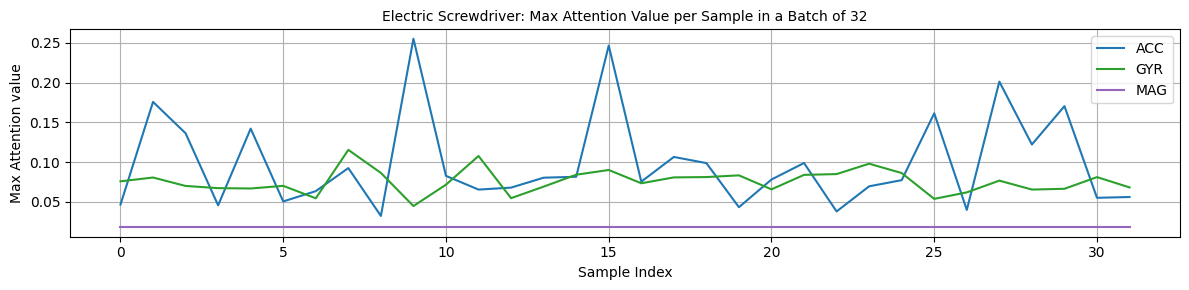

In [50]:
# Ensure values are on CPU and converted to numpy
avg_attn_per_window_np = {
    modality: torch.stack(values).cpu().numpy()
    for modality, values in avg_attn_per_window.items()
}

# Plotting max attention per sample for each modality
plt.figure(figsize=(12, 3))
plt.title("Electric Screwdriver: Max Attention Value per Sample in a Batch of 32", fontsize=10)

colors = {
    'acc': 'tab:blue',
    'gyr': 'tab:green',
    'mag': 'tab:purple',
}

for modality, max_vals in avg_attn_per_window_np.items():
    plt.plot(max_vals, label=modality.upper(), color=colors.get(modality, 'black'))

plt.xlabel("Sample Index")
plt.ylabel("Max Attention value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# Actual mapping from original class index to label
# label_dict = {
#     14: 'tightening_double',
#     7: 'shaking',
#     8: 'undefined',
#     2: 'tightening',
#     5: 'motor_activity_ccw',
#     4: 'motor_activity_cw',
#     3: 'untightening',
#     6: 'manual_motor_rotation'
# }

# # Your remapping: original class index to new class index
# remap = {
#     np.int64(2): 0,
#     np.int64(3): 1,
#     np.int64(4): 2,
#     np.int64(5): 3,
#     np.int64(6): 4,
#     np.int64(7): 5,
#     np.int64(8): 6,
#     np.int64(14): 7
# }

"pneumatic_screwdriver"

label_dict = {7: 'shaking',
 5: 'motor_activity_ccw',
 3: 'untightening',
 38: 'impact',
 8: 'undefined',
 2: 'tightening',
 4: 'motor_activity_cw',
 14: 'tightening_double'}
 
remap = {np.int64(2): 0,
 np.int64(3): 1,
 np.int64(4): 2,
 np.int64(5): 3,
 np.int64(7): 4,
 np.int64(8): 5,
 np.int64(14): 6,
 np.int64(38): 7}

# Invert remap dict: new_idx -> original_idx
inv_remap = {v: k for k, v in remap.items()}

# Map new_idx -> label string using label_dict
newidx_to_label = {new_idx: label_dict[orig_idx] for new_idx, orig_idx in inv_remap.items()}

In [52]:
# [newidx_to_label[int(c)] for c in labels]
# Convert one-hot encoded tensor to class indices
label_indices = torch.argmax(labels, dim=1).cpu().numpy()  # shape: (batch_size,)

# Map to label names using newidx_to_label (a dict or list)
true_labels = [newidx_to_label[int(idx)] for idx in label_indices]

In [54]:
import plotly.graph_objects as go

# Ensure values are on CPU and converted to numpy
avg_attn_per_window_np = {
    modality: torch.stack(values).cpu().numpy()
    for modality, values in avg_attn_per_window.items()
}

# Replace this with your actual predicted class labels for each sample
# Example: predicted_classes = ['drill', 'cut', 'screw', ...]
predicted_classes = true_labels

# Sample indices (x-axis)
sample_indices = list(range(len(predicted_classes)))

# Create interactive plot
fig = go.Figure()

colors = {
    'acc': 'blue',
    'gyr': 'green',
    'mag': 'purple',
}

# Add traces for each modality
for modality, max_vals in avg_attn_per_window_np.items():
    hover_texts = [
        f"Sample {i}<br>Predicted: {predicted_classes[i]}<br>Max Attention: {max_vals[i]:.4f}"
        for i in sample_indices
    ]
    fig.add_trace(go.Scatter(
        x=sample_indices,
        y=max_vals,
        mode='lines+markers',
        name=modality.upper(),
        line=dict(color=colors.get(modality, 'gray')),
        text=hover_texts,
        hoverinfo='text'
    ))

# Update layout
fig.update_layout(
    title="Pneumatic Screwdriver: Max Attention Value per Sample (Batch of 32)",
    xaxis_title="Sample Index",
    yaxis_title="Max Attention Value",
    legend_title="Modality",
    height=350,
    margin=dict(l=30, r=30, t=50, b=40),
    template="plotly_white"
)

fig.show()


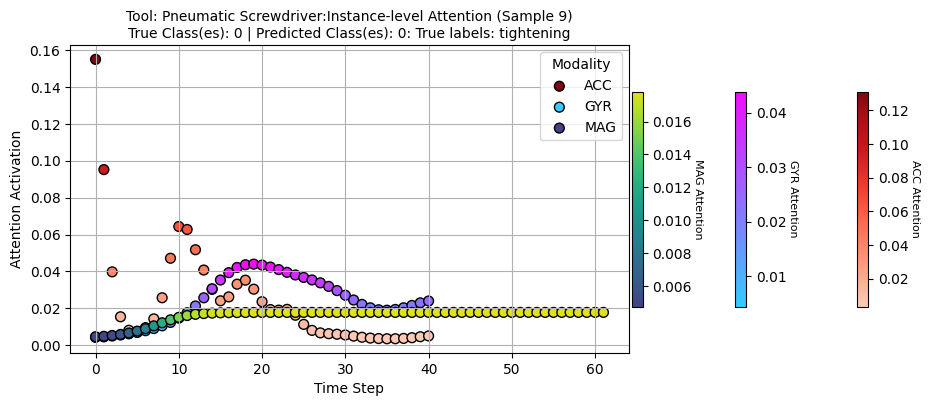

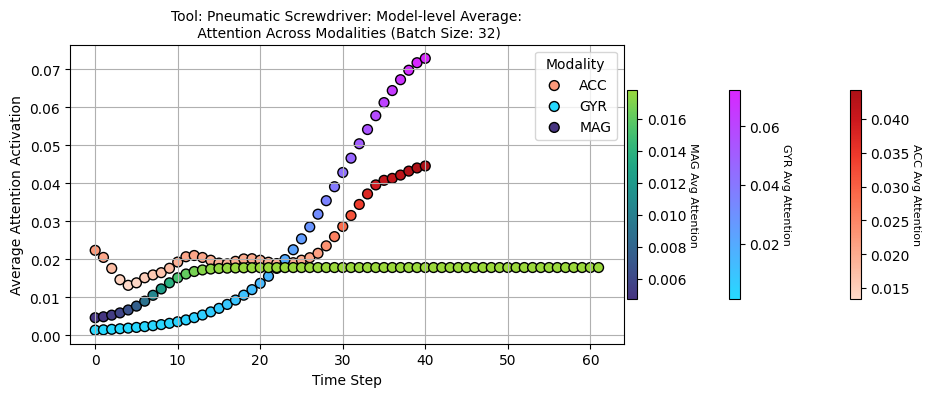

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.colors import Normalize

# 'reds' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
# 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# Sample index and modalities
sample_idx = 9
modalities = ['acc', 'gyr', 'mag']
figsize_tuple = (10, 4)
# Darker, richer colormaps for each modality
raw_colormaps = {
    'acc': 'Reds',    # dark orange to bright yellow
    'gyr': 'cool',       # cyan to magenta
    'mag': 'viridis'     # dark green to bright yellow
}

def truncate_colormap(cmap_name, min_val=0.15, max_val=0.85, n=256):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{min_val},{max_val})",
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap

# -------- Instance-level heatmap -------- 
plt.figure(figsize=figsize_tuple)
plt.title(
    f'Tool: Pneumatic Screwdriver:Instance-level Attention (Sample {sample_idx})\n'
    f'True Class(es): {label_indices[sample_idx]} | Predicted Class(es): {label_indices[sample_idx]}: True labels: {newidx_to_label[int(label_indices[sample_idx])]}',
    fontsize=10
)

plt.xlabel("Time Step")
plt.ylabel("Attention Activation")

for modality in modalities:
    att = att_weights[modality][sample_idx].cpu().numpy()
    att_smooth = gaussian_filter1d(att, sigma=1.2)
    timesteps = np.arange(len(att_smooth))

    vmin = np.percentile(att_smooth, 1)
    vmax = np.percentile(att_smooth, 99)

    # cmap = truncate_colormap(raw_colormaps[modality], 0.15, 0.85)
    cmap = truncate_colormap(raw_colormaps[modality], 0.2, 0.95)
    norm = Normalize(vmin=vmin, vmax=vmax)

    sc = plt.scatter(
        timesteps,
        att_smooth,
        c=att_smooth,
        cmap=cmap,
        norm=norm,
        s=50,
        edgecolors='k',
        label=modality.upper()
    )

    cbar = plt.colorbar(sc, pad=0.005, shrink=0.7)
    cbar.set_label(f'{modality.upper()} Attention', rotation=270, labelpad=8,  fontsize=8)

plt.legend(title="Modality")
plt.grid(True)
plt.tight_layout(pad=0.5)
plt.show()


# -------- Model-level Average heatmap --------
plt.figure(figsize=figsize_tuple)
plt.title(f"Tool: Pneumatic Screwdriver: Model-level Average:\n Attention Across Modalities (Batch Size: {batch_size})", fontsize=10)
plt.xlabel("Time Step")
plt.ylabel("Average Attention Activation")

for modality in modalities:
    avg_att = att_weights[modality].mean(dim=0).cpu().numpy()
    avg_att_smooth = gaussian_filter1d(avg_att, sigma=1.2)
    timesteps = np.arange(len(avg_att_smooth))

    vmin = np.percentile(avg_att_smooth, 1)
    vmax = np.percentile(avg_att_smooth, 99)

    cmap = truncate_colormap(raw_colormaps[modality], 0.15, 0.85)
    norm = Normalize(vmin=vmin, vmax=vmax)

    sc = plt.scatter(
        timesteps,
        avg_att_smooth,
        c=avg_att_smooth,
        cmap=cmap,
        norm=norm,
        s=50,
        edgecolors='k',
        label=modality.upper()
    )

    cbar = plt.colorbar(sc, pad=0.005, shrink=0.7)
    cbar.set_label(f'{modality.upper()} Avg Attention', rotation=270, labelpad=8, fontsize=8)

plt.legend(title="Modality")
plt.grid(True)
plt.tight_layout(pad=0.8)
plt.show()

In [1]:
# labels

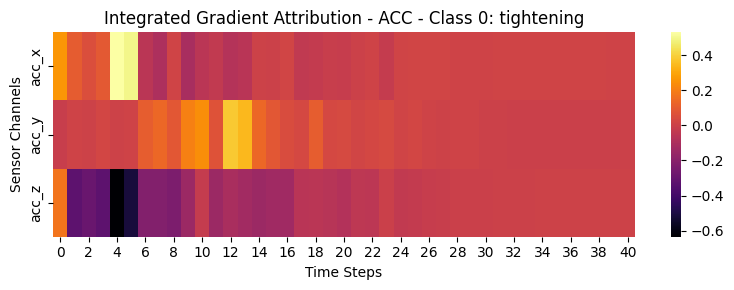

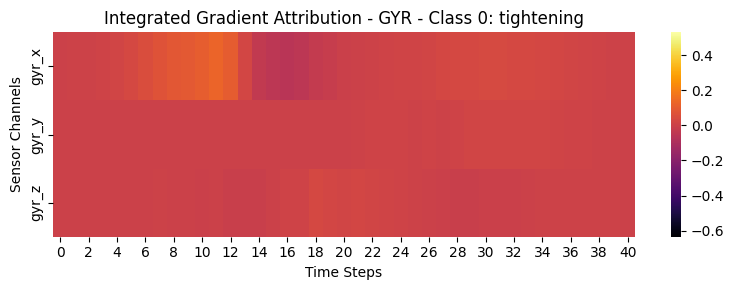

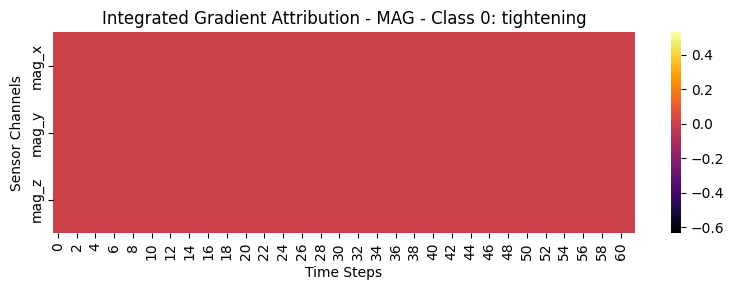

In [75]:
from captum.attr import IntegratedGradients
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Wrapper model for IG (for one modality at a time)
class WrappedModalityModel(nn.Module):
    def __init__(self, model, modality='acc'):
        super().__init__()
        self.model = model
        self.modality = modality

    def forward(self, x_input):
        batch_size, seq_len, channels = x_input.shape
        device = x_input.device

        def dummy(s_len, ch): 
            return torch.zeros(batch_size, s_len, ch, device=device)

        x_acc, x_gyr, x_mag, x_mic = {
            'acc': (x_input, dummy(41, 3), dummy(62, 3), dummy(3200, 1)),
            'gyr': (dummy(41, 3), x_input, dummy(62, 3), dummy(3200, 1)),
            'mag': (dummy(41, 3), dummy(41, 3), x_input, dummy(3200, 1)),
            'mic': (dummy(41, 3), dummy(41, 3), dummy(62, 3), x_input),
        }[self.modality]

        outputs, _ = self.model(x_acc, x_gyr, x_mag, x_mic)
        return outputs


# Map modalities to input data and their channel names
modality_channel_names = {
    'acc': ['acc_x', 'acc_y', 'acc_z'],
    'gyr': ['gyr_x', 'gyr_y', 'gyr_z'],
    'mag': ['mag_x', 'mag_y', 'mag_z']
}

sample_map = {
    'acc': x_acc.to(device),
    'gyr': x_gyr.to(device),
    'mag': x_mag.to(device)
}

# Attribution collector
all_attributions = []
all_channel_labels = []

# Choose target sample and label
target_sample_idx = 9
target_label = torch.argmax(labels[target_sample_idx]).item()

global_min = float('inf')
global_max = float('-inf')
# Compute and collect attribution per modality
for modality in ['acc', 'gyr', 'mag']:
    x_sample = sample_map[modality][target_sample_idx:target_sample_idx+1]

    wrapped_model = WrappedModalityModel(model, modality=modality).to(device)
    wrapped_model.train()

    ig = IntegratedGradients(wrapped_model)
    baseline = torch.zeros_like(x_sample)

    attributions, _ = ig.attribute(
        inputs=x_sample,
        baselines=baseline,
        target=target_label,
        return_convergence_delta=True
    )

    attr_np = attributions.squeeze().detach().cpu().numpy().T  # shape: [time, channels]
    # Update global min/max
    curr_min = attr_np.min()
    curr_max = attr_np.max()
    if curr_min < global_min:
        global_min = curr_min
    if curr_max > global_max:
        global_max = curr_max

    all_attributions.append(attr_np)  # collect [time, ch]
    all_channel_labels += modality_channel_names[modality]

# Get max time steps across all attributions
max_time_steps = max(attr.shape[0] for attr in all_attributions)
figsize_tuple = (8, 3)
# Pad all attributions to max time steps
padded_attrs = []
for attr in all_attributions:
    t, c = attr.shape
    if t < max_time_steps:
        pad_width = ((0, max_time_steps - t), (0, 0))  # pad time axis only
        padded = np.pad(attr, pad_width, mode='constant')
    else:
        padded = attr
    padded_attrs.append(padded)

# Compute global min and max for color normalization
# global_min = min(p.min() for p in padded_attrs)
# global_max = max(p.max() for p in padded_attrs)
# print(f"Global min: {global_min}, Global max: {global_max}")
# Plot each modality separately
for i, modality in enumerate(['acc', 'gyr', 'mag']):
    attr = padded_attrs[i].T  # transpose to have channels on y-axis, time on x-axis
    channel_names = modality_channel_names[modality]

    plt.figure(figsize=figsize_tuple)
    sns.heatmap(attr.T, 
                cmap='inferno', 
                vmin=global_min, vmax=global_max,
                yticklabels=channel_names)
    plt.title(f"Integrated Gradient Attribution - {modality.upper()} - Class {target_label}: {newidx_to_label[int(label_indices[target_sample_idx])]}",)
    plt.xlabel("Time Steps")
    plt.ylabel("Sensor Channels")
    plt.tight_layout()
    plt.show()